In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [56]:
data_name = "transformed_business"
# data_name = "dummy_object"
df = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,26,1142,0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,61,214,0,satisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,52,2035,4,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

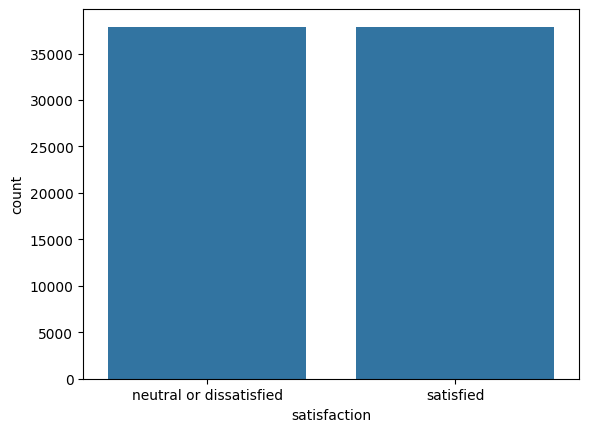

In [57]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

## Train-Test Splitting

In [58]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,25,235,1
1,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,26,1142,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,25,562,11
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,61,214,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,52,2035,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75775,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,55,1504,0
75776,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,46,1501,0
75777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,27,2033,0
75778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,25,544,0


In [59]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
75775    neutral or dissatisfied
75776    neutral or dissatisfied
75777    neutral or dissatisfied
75778    neutral or dissatisfied
75779    neutral or dissatisfied
Name: satisfaction, Length: 75780, dtype: object

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (53046, 77) and test set is :(22734, 77)


In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.17498508, -0.40626639, -0.49122977, ...,  0.01647993,
        -0.0130969 , -0.53301951],
       [-0.17498508, -0.40626639,  2.03570724, ..., -0.90002623,
         0.72813596,  3.29163709],
       [-0.17498508,  2.46143914, -0.49122977, ..., -0.90002623,
         0.06571998, -0.53301951],
       ...,
       [-0.17498508, -0.40626639, -0.49122977, ..., -2.12203444,
        -0.98281013,  2.4417134 ],
       [-0.17498508,  2.46143914, -0.49122977, ..., -1.35827931,
         0.81757983, -0.53301951],
       [-0.17498508, -0.40626639, -0.49122977, ..., -0.51814867,
        -0.64540306, -0.53301951]])

## Set paramiter CV

In [62]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## K-NN(K Nearest Neighbours)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.040324 วินาที


In [64]:

#Predict the accuracy of the model
y_pred_knn=model_knn.predict(X_test)

accuracy_KNN=accuracy_score(y_pred_knn,y_test)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

report=classification_report(y_test,y_pred_knn)
print("Classification Report is : \n",report)

Accuracy of Knn is : 97.15 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     11333
              satisfied       0.98      0.96      0.97     11401

               accuracy                           0.97     22734
              macro avg       0.97      0.97      0.97     22734
           weighted avg       0.97      0.97      0.97     22734



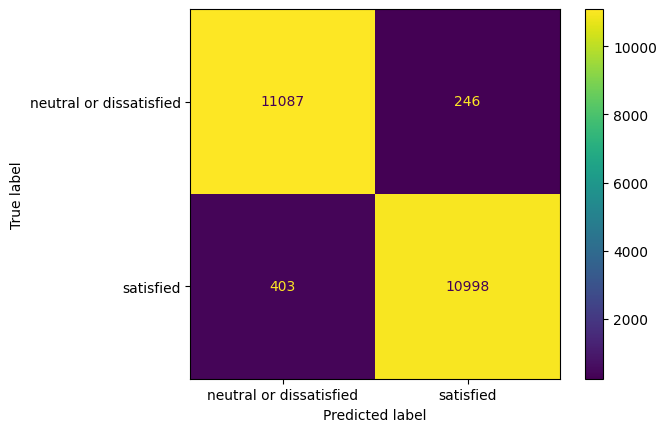

In [65]:
cm_2= confusion_matrix(y_test, y_pred_knn, labels=model_knn.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_knn.classes_)
disp_2.plot()

In [66]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_knn = cross_val_score(model_knn, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_KNN = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_KNN:.6f} วินาที")


Cross Validation Scores (KNN): [0.96946565 0.97285835 0.9700311  0.97257563 0.97031383 0.97285835
 0.97539593 0.9739819  0.96521493 0.97115385 0.9739819  0.97285068
 0.97285068 0.96606335 0.96493213]
Mean CV Accuracy: 0.9710
Standard Deviation CV Accuracy: 0.0032
เวลาที่ใช้ในการทำ Cross Validation: 4.423395 วินาที


In [67]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, model_knn.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9792821324887834
Test Accuracy: 0.9714524500747779


In [68]:
import pickle
pickle_out = open("../../pipelines/model_KNN.pkl", mode = "wb")
pickle.dump(model_knn, pickle_out)
pickle_out.close()

with open('../../pipelines/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [69]:
import pickle
df_t = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
34659,0,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,1,36,354,0,neutral or dissatisfied
5457,0,0,1,0,0,0,0,0,1,0,...,1,1,0,0,1,1,8,733,0,neutral or dissatisfied
21936,1,0,0,0,0,0,1,0,0,0,...,1,1,0,1,0,1,53,234,0,satisfied
63186,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,8,1587,3,neutral or dissatisfied
63497,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,39,1341,0,neutral or dissatisfied
50677,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,1,33,1979,0,neutral or dissatisfied
3186,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,60,130,0,satisfied
69418,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,30,562,0,neutral or dissatisfied
56100,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,62,552,0,neutral or dissatisfied
5836,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,43,1983,3,satisfied


In [70]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
34659,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,1,36,354,0
5457,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,1,1,8,733,0
21936,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,1,53,234,0
63186,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,8,1587,3
63497,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,39,1341,0
50677,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,33,1979,0
3186,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,60,130,0
69418,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,30,562,0
56100,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,62,552,0
5836,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,43,1983,3


In [71]:
y_sam = df_sam.iloc[:,-1]
y_sam


34659    neutral or dissatisfied
5457     neutral or dissatisfied
21936                  satisfied
63186    neutral or dissatisfied
63497    neutral or dissatisfied
50677    neutral or dissatisfied
3186                   satisfied
69418    neutral or dissatisfied
56100    neutral or dissatisfied
5836                   satisfied
54246    neutral or dissatisfied
44863    neutral or dissatisfied
20124                  satisfied
46786                  satisfied
32543                  satisfied
9260                   satisfied
25386    neutral or dissatisfied
37429                  satisfied
14974                  satisfied
18978                  satisfied
Name: satisfaction, dtype: object

In [72]:

model = pickle.load(open("../../pipelines/model_KNN.pkl", 'rb'))
scaler_1 = pickle.load(open("../../pipelines/scaler.pkl", 'rb'))

scaler_new = scaler_1.transform(X_sam)
preds = model.predict(scaler_new)
print(preds)
accuracy_KNN=accuracy_score(preds,y_sam)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

['neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied']
Accuracy of Knn is : 100.0 % .
